**Кубышкина Екатерина, 11 вариант**

**Задание 4.1.11**

<img src='numerical-methods/c12xQ-3Q6Zk.jpg'>

<img src='Jj3IhlFiedA.jpg'>

In [7]:
import numpy as np

In [8]:
#Задание матрицы А и вектора свободных членов В
A = np.matrix([[3.96, -1.5, 0, -0.99, -1.4, 0], [3.96, 18.3, 1.6, 6.93, 4.3, 1.5], [0, 4.6, -13, 4.29, -1.4, 2.3], 
               [3.96, 0.4, 0, 5.94, 1.5, 0], [5.94, 3.1, 3.4, 0.99, 14.4,0.9], [-2.97, -1.2, 0.8, 4.95, -2.7, 12.7]])
b = np.array([32.83, 91.31, 29.91, 98.8, 56.97, 37.92])
A,b

(matrix([[  3.96,  -1.5 ,   0.  ,  -0.99,  -1.4 ,   0.  ],
         [  3.96,  18.3 ,   1.6 ,   6.93,   4.3 ,   1.5 ],
         [  0.  ,   4.6 , -13.  ,   4.29,  -1.4 ,   2.3 ],
         [  3.96,   0.4 ,   0.  ,   5.94,   1.5 ,   0.  ],
         [  5.94,   3.1 ,   3.4 ,   0.99,  14.4 ,   0.9 ],
         [ -2.97,  -1.2 ,   0.8 ,   4.95,  -2.7 ,  12.7 ]]),
 array([32.83, 91.31, 29.91, 98.8 , 56.97, 37.92]))

In [9]:
# решаем через библиотечную функцию
x_gauss = np.linalg.solve(A,b)
print(x_gauss)

[10.11111111 -1.          1.         10.21212121 -1.          1.        ]


In [10]:
# преобразуем к удобному виду Ax=b <=> x=Bx+c
n=6
B=np.zeros([n,n])
c=np.zeros(n)

for i in range(A.shape[0]):
    c[i]=b[i]/A[i,i]
    for j in range(A.shape[1]):
        if i!=j:
            B[i,j]=-A[i,j]/A[i,i]
print(B)
print(c)

[[ 0.          0.37878788 -0.          0.25        0.35353535 -0.        ]
 [-0.21639344  0.         -0.08743169 -0.37868852 -0.23497268 -0.08196721]
 [ 0.          0.35384615  0.          0.33       -0.10769231  0.17692308]
 [-0.66666667 -0.06734007 -0.          0.         -0.25252525 -0.        ]
 [-0.4125     -0.21527778 -0.23611111 -0.06875     0.         -0.0625    ]
 [ 0.23385827  0.09448819 -0.06299213 -0.38976378  0.21259843  0.        ]]
[ 8.29040404  4.98961749 -2.30076923 16.63299663  3.95625     2.98582677]


In [11]:
# метод Зейделя
def Seidel(B,c,x0,maxiter=10,eps=1e-5):
    x_new=x0
    for i in range(maxiter):
        x_old=x_new
        x_new=np.dot(B,x_old)+c
        if np.linalg.norm(x_new-x_old,ord=np.inf)<eps:
            return x_new,i+1
        
    return x_new,i+1

In [12]:
# достаточное условие сходимости
print('||B|| =',np.linalg.norm(B,ord=np.inf))

||B|| = 0.9994535519125683


Достаточное  условие сходимости итерационных методов: $$||B||<1$$
здесь данное условие выполняется, и поскольку норма матрицы 𝐵<1, то метод сходится со скоростью геометрической прогрессии

Тут взяли приближение, расположенное близко к нашему решению и за 10 итераций метод почти подобрался к решению

In [13]:
x0=np.array([0,0,0,0,0,0])
x_Seidel=Seidel(B, c, x0, 10)[0]
print('x =',x_Seidel)
print(np.linalg.norm(x_gauss-x_Seidel,ord=np.inf))

x = [ 9.77611872 -0.89747247  0.76270857 10.06852674 -1.07823526  1.10605719]
0.3349923958123249


Здесь все значительно хуже

In [14]:
x0=np.array([100,10,10,100,10,10])
x_Seidel=Seidel(B, c, x0, 10)[0]
print('x =',x_Seidel)
print(np.linalg.norm(x_gauss-x_Seidel,ord=np.inf))

x = [ 1.31270437e+01 -1.60613595e+00  3.20732807e+00  1.20266354e+01
  8.76127572e-02 -1.13427551e-03]
3.015932540707702


При различных начальных приближениях, когда одно приближение находится ближе к корню, а другое – дальше, 
погрешность будет сильно отличается

**Задание 4.2**

<img src="KsnupLoG4Zs.jpg">

In [15]:
x0=np.array([0,0,0,0,0,0])
x_Seidel,number=Seidel(B,c,x0,100,1e-6)
print('x =',x_Seidel)
print('Число итераций:',number)

x = [10.11111103 -1.00000028  0.99999988 10.21212068 -1.00000039  1.00000007]
Число итераций: 49


**Задание 4.4.5**

<img src="Ggq4DVPDN00.jpg">

<img src="-iDBYwHgzxc.jpg">

In [16]:
def B(t):
    return np.array([[np.sin(t), 0.15, 0.1, 0.3],
                     [0.1, np.sin(t), 0.4, -0.05],
                     [0.3, 0.1, np.sin(t), 0.1],
                     [0.2, -0.12, 0.1, np.sin(t)]])

c = np.array([0, 1, 2, 3])
t = np.arange(-1, 1.1, 0.2)

In [17]:
import matplotlib.pyplot as plt
lst = []
for i in t:
    lst.append(np.linalg.norm(B(i), ord = np.inf))

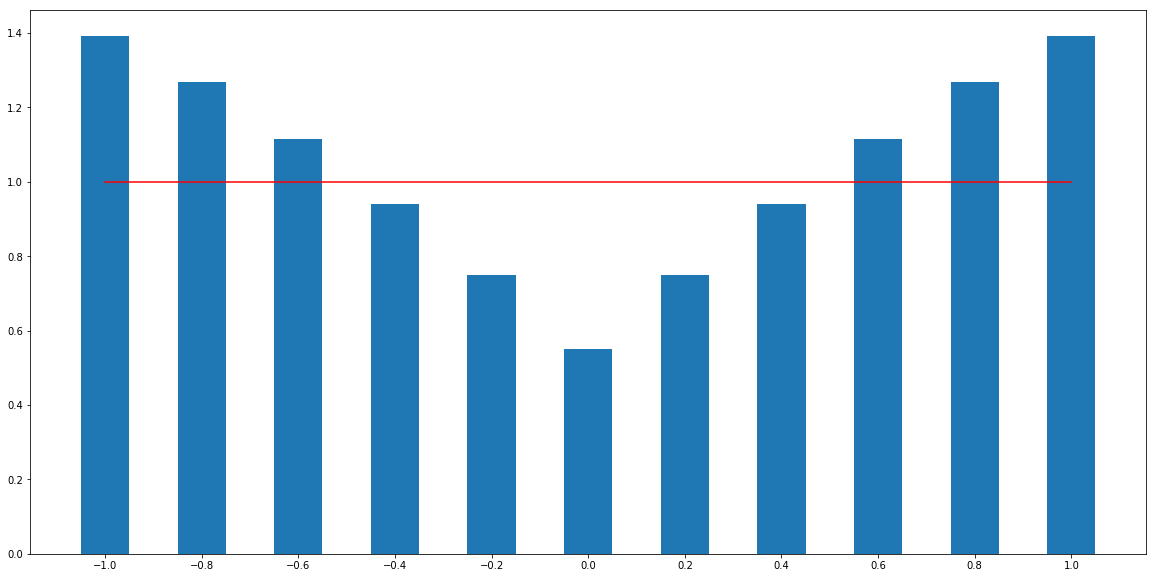

In [18]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.bar(t, lst, width=0.1)
ax.set_xticks(t)
plt.plot(t, np.ones(t.shape), c = 'r')
plt.show()

In [19]:
x0=np.array([0,0,0,0])
x_Seidel=Seidel(B(0.4), c, x0, 100, eps = 1e-5)[0]
print('x =',x_Seidel)

x = [7.04071327 8.27104816 9.25392062 7.10962481]


**Задание 4.6.3**

<img src="IQdc-7yeWcU.jpg">

<img src="9Qo44B9HsiA.jpg">

In [20]:
n = 40
diag = 150 * np.ones(n)
diag_1 = 33 * np.ones(n-1)
diag_5 = 17 * np.ones(n-5)
diag_6 = 2 * np.ones(n-6)
diag_8 = 1 * np.ones(n-8)
b = np.arange(1, n+1) * np.exp(10/np.arange(1, n+1))

In [21]:
A = np.diag(diag) + np. diag(diag_1, 1) + np.diag(diag_5, 5)+np.diag(diag_6, 6)+np.diag(diag_8, 8)

In [35]:
def seidel (A, b, x0, iterations, eps):
    x = np.zeros(shape=n)
    x_prev = x0.copy()
    for i in range(iterations):
        for m in range(n):
            sum1 = np.sum(A[m,j] * x[j] for j in range(m))
            sum2 = np.sum(A[m,j] * x_prev[j] for j in range(m + 1, n))
            x[m] = (b[m] - sum1 - sum2 ) / A[m,m]
        if np.linalg.norm(x - x_prev) < eps:
            return (x, i + 1)
        x_prev = x.copy()
    return (x, iterations)

In [37]:
x0=np.zeros(n)
x_Seidel=seidel(A, b, x0, 1000, 1e-5)[0]
print('x =',x_Seidel)

x = [1.46414254e+02 1.85302937e+00 4.84081627e-01 2.64512862e-01
 1.92955556e-01 1.61792891e-01 1.46320927e-01 1.38332468e-01
 1.34424672e-01 1.32962466e-01 1.33069778e-01 1.34239498e-01
 1.36162337e-01 1.38636615e-01 1.41517166e-01 1.44722111e-01
 1.48182077e-01 1.51828597e-01 1.55625220e-01 1.59605304e-01
 1.63628222e-01 1.67735291e-01 1.72013803e-01 1.76420420e-01
 1.80528627e-01 1.85345959e-01 1.90026055e-01 1.94203349e-01
 1.98086059e-01 2.04452469e-01 2.04847890e-01 2.08642757e-01
 2.14518305e-01 2.22825128e-01 2.14731784e-01 2.58916488e-01
 2.63317189e-01 2.72248719e-01 2.60664033e-01 3.42406778e-01]


C:\Users\katek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  
C:\Users\katek\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  import sys
